In [3]:
df.head()

,Unnamed: 0,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [4]:
df.gender.value_counts()

M    139
F     76
Name: gender, dtype: int64

In [5]:
df.status=pd.get_dummies(df.status,drop_first=True)

In [6]:
df.gender=pd.get_dummies(df.gender,drop_first=True)

In [7]:
X=df.drop(['gender','Unnamed: 0','sl_no'],axis=1)
y=df['gender']

In [8]:
X.ssc_b=pd.get_dummies(X.ssc_b,drop_first=True)

In [9]:
X.hsc_b=pd.get_dummies(X.hsc_b,drop_first=True)

In [10]:
X.hsc_s=pd.get_dummies(X.hsc_s,drop_first=True)

In [11]:
X.workex=pd.get_dummies(X.workex,drop_first=True)

In [12]:
X.specialisation=pd.get_dummies(X.specialisation,drop_first=True)

In [13]:
degree_t=pd.get_dummies(df.degree_t,drop_first=True)

In [14]:
X=pd.concat([X,degree_t],axis=1)

In [15]:
X.drop("degree_t",axis=1,inplace=True)

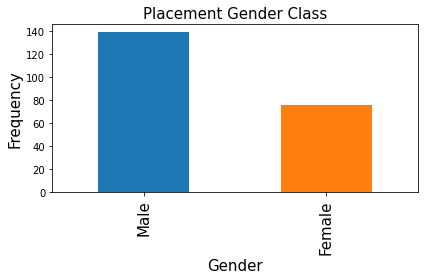

In [16]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
labels=['Male','Female']
label_index=[0,1]
y.value_counts().plot(kind="bar",color=colors)
plt.title('Placement Gender Class',fontsize=15)
plt.xlabel('Gender',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.xticks(label_index,labels,fontsize=15)
plt.tight_layout()
plt.savefig('fig8(a).eps')

In [17]:
sm=SMOTE(random_state=0)
X,y=sm.fit_sample(X,y)


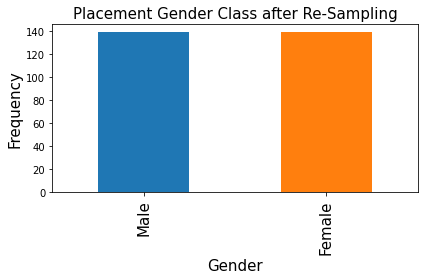

In [18]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
labels=['Male','Female']
label_index=[0,1]
y.value_counts().plot(kind="bar",color=colors)
plt.title('Placement Gender Class after Re-Sampling',fontsize=15)
plt.xlabel('Gender',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.xticks(label_index,labels,fontsize=15)
plt.tight_layout()
plt.savefig('fig8(b).eps')

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2,random_state=0)

In [21]:
xtrain.shape,xtest.shape

((222, 14), (56, 14))

In [22]:
xtrain_res=xtrain.copy()

In [23]:
ytrain_res=ytrain.copy()

In [24]:
#xtrain_res,ytrain_res=sm.fit_sample(xtrain,ytrain.ravel())

In [25]:
xtrain_res.shape,ytrain_res.shape

((222, 14), (222,))

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score,GridSearchCV

In [27]:
scaler=StandardScaler()
xtrain_res=scaler.fit_transform(xtrain_res)
xtest=scaler.transform(xtest)

In [28]:
rf=RandomForestClassifier()

In [29]:
parameters_xg = {'max_depth':[3,6,7], 'learning_rate': [0.1,0.2], 'n_estimators': [300,200], 
                 'min_child_weight': [4], 'reg_alpha': [6,0], 'reg_lambda': [1,8],'max_delta_step':[2],
                 'gamma':[0],'seed':[1]}

parameters_svm = {'C':[0.9,0.01],'kernel':['rbf','linear'], 'gamma':['auto'], 'probability':[True,False],
                  'random_state':[0,7,16],'decision_function_shape':['ovo','ovr'],'degree':[3,4,10]}

parameters_rf = {'n_estimators': [100,50], 'max_features': [7,'auto',None],
                 'n_jobs': [-1], 'min_samples_leaf': [2,4,], 'random_state':[1,7,], 
                 'min_samples_split':[2,6,], 'oob_score': [True,False],
                 'criterion': ['gini'], 'warm_start': [True,False]}
parameters_gb = {
    'n_estimators' : [100,200,300],
    'learning_rate' : [.1,.2,.3],
    'max_depth' : [3,5,7]
}


In [30]:
#CV_rfc = GridSearchCV(estimator=rf, param_grid=parameters_rf, cv= 5)
#CV_rfc.fit(X, y)

In [31]:
#CV_rfc.best_params_

In [32]:
rfc1=RandomForestClassifier(random_state=42, criterion= 'gini',
                            max_features= 7,
                            min_samples_leaf=2,
                            min_samples_split= 2,
                            n_estimators=50,
                            n_jobs=-1,
                            oob_score= True,
                            warm_start= True)

In [33]:

rfc1.fit(xtrain_res,ytrain_res)

RandomForestClassifier(max_features=7, min_samples_leaf=2, n_estimators=50,
                       n_jobs=-1, oob_score=True, random_state=42,
                       warm_start=True)

In [34]:
rf_ypredict=rfc1.predict(xtest)

In [35]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve

In [36]:
print(classification_report(ytest,rf_ypredict))

              precision    recall  f1-score   support

           0       0.88      0.85      0.87        27
           1       0.87      0.90      0.88        29

    accuracy                           0.88        56
   macro avg       0.88      0.87      0.87        56
weighted avg       0.88      0.88      0.87        56



In [37]:
# XGBoost Classifier
from xgboost import XGBClassifier

In [38]:
xgb_classifier=XGBClassifier()

In [39]:
#CV_xgb = GridSearchCV(estimator=xgb_classifier, param_grid=parameters_xg, cv= 5)
#CV_xgb.fit(X, y)

In [40]:
#CV_xgb.best_params_

In [41]:
xgb=XGBClassifier(gamma=0,
                    learning_rate=0.1,
                    max_delta_step=2,
                    max_depth= 6,min_child_weight=4,
                    n_estimators=200,reg_alpha=0,
                    reg_lambda=8,seed=1)

In [42]:
xgb_classifier.fit(xtrain_res,ytrain_res)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [43]:
xgb_ypredict=xgb_classifier.predict(xtest)

In [44]:
print(classification_report(ytest,xgb_ypredict))

              precision    recall  f1-score   support

           0       0.79      0.85      0.82        27
           1       0.85      0.79      0.82        29

    accuracy                           0.82        56
   macro avg       0.82      0.82      0.82        56
weighted avg       0.82      0.82      0.82        56



In [45]:
# Gradient boosting classifer
from sklearn.ensemble import GradientBoostingClassifier

In [46]:
gb_class = GradientBoostingClassifier()

#gb_grid = GridSearchCV(gb_class, parameters_gb, cv = 5, n_jobs=-1)
#gb_grid.fit(X, y)

#gb_grid.best_params_

In [47]:
#gb_grid.best_score_

In [48]:
gb_opt = GradientBoostingClassifier(learning_rate=0.2, loss='deviance', max_depth=5)

In [49]:
gb_opt.fit(xtrain_res,ytrain_res)

GradientBoostingClassifier(learning_rate=0.2, max_depth=5)

In [50]:
gb_ypred=gb_opt.predict(xtest)

In [51]:
print(classification_report(ytest,gb_ypred))

              precision    recall  f1-score   support

           0       0.76      0.81      0.79        27
           1       0.81      0.76      0.79        29

    accuracy                           0.79        56
   macro avg       0.79      0.79      0.79        56
weighted avg       0.79      0.79      0.79        56



In [52]:
#Feature importance

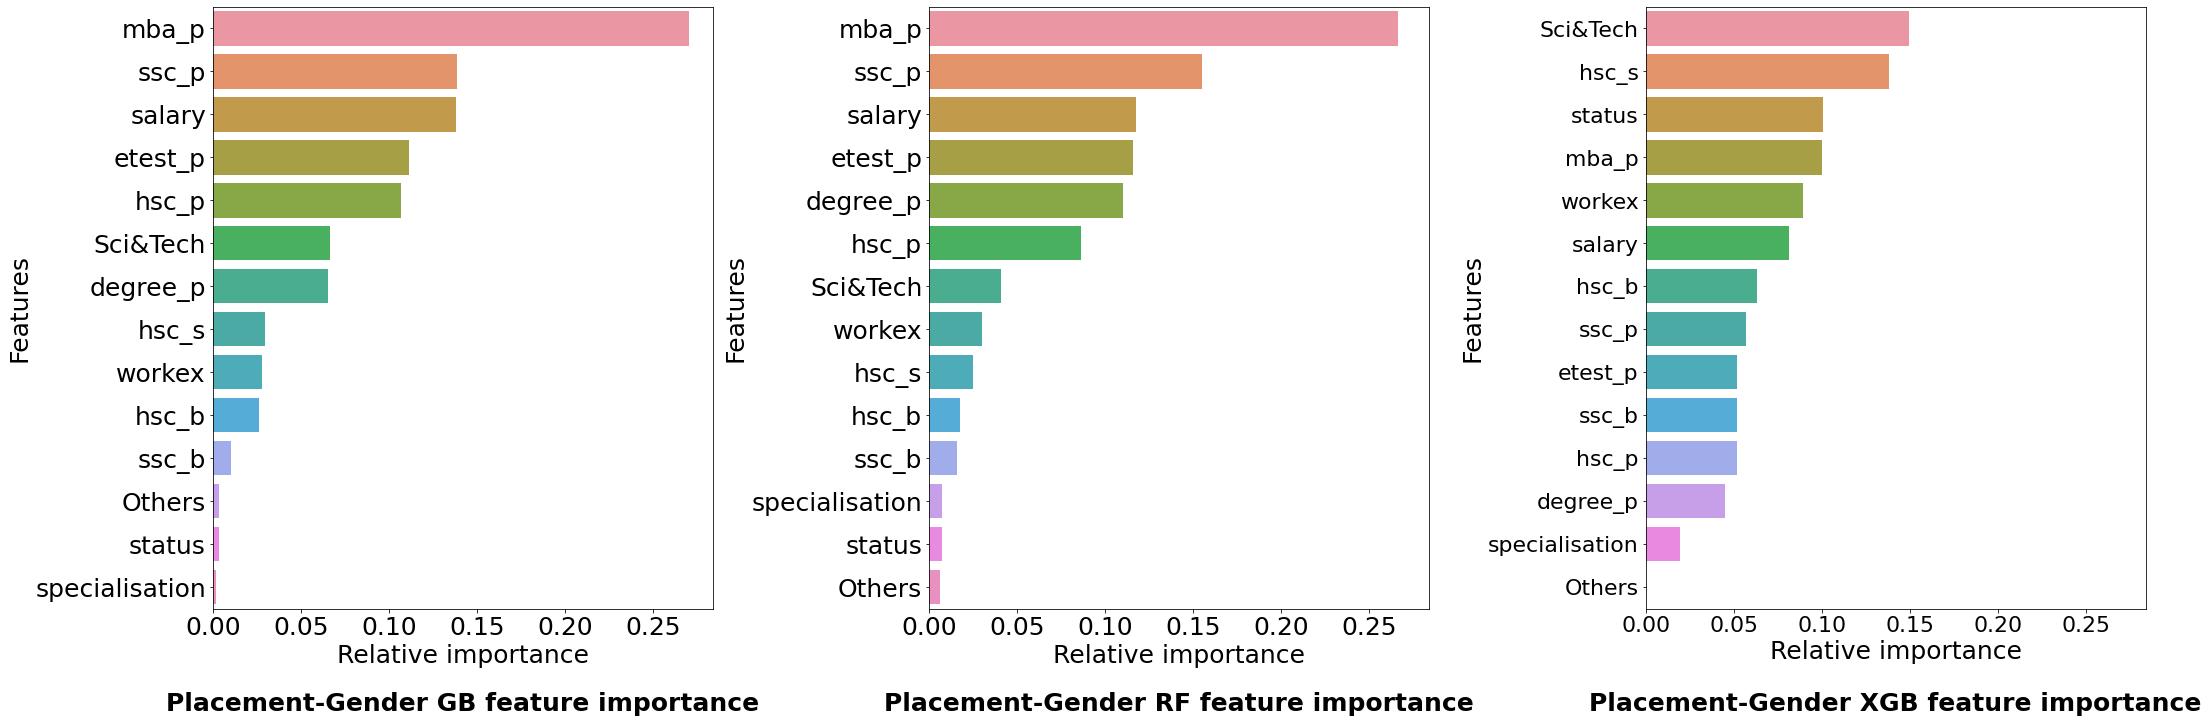

In [54]:
nrows =1
ncols=3
fig, axes = plt.subplots(nrows = nrows, ncols = ncols, sharex="all", figsize=(30,10))

names_classifiers = [("Placement-Gender GB", gb_opt),("Placement-Gender RF",rfc1),("Placement-Gender XGB",xgb_classifier)]

nclassifier = 0
for row in range(nrows):
    for col in range(ncols):
        name = names_classifiers[nclassifier][0]
        classifier = names_classifiers[nclassifier][1]
        indices = np.argsort(classifier.feature_importances_)[::-1][:40]
        g = sns.barplot(y=X.columns[indices][:40],x = classifier.feature_importances_[indices][:40] , orient='h',ax=axes[col])
        g.set_xlabel("Relative importance",fontsize=25)
        g.set_ylabel("Features",fontsize=25)
        g.tick_params(labelsize=25)
        g.set_title(name + " feature importance",fontsize=25,y=-0.18,fontweight='bold')
        plt.tick_params(labelsize=22)
        nclassifier += 1
plt.tight_layout()
plt.savefig('fig15.eps')

In [107]:
# Subplot of confusion matrix

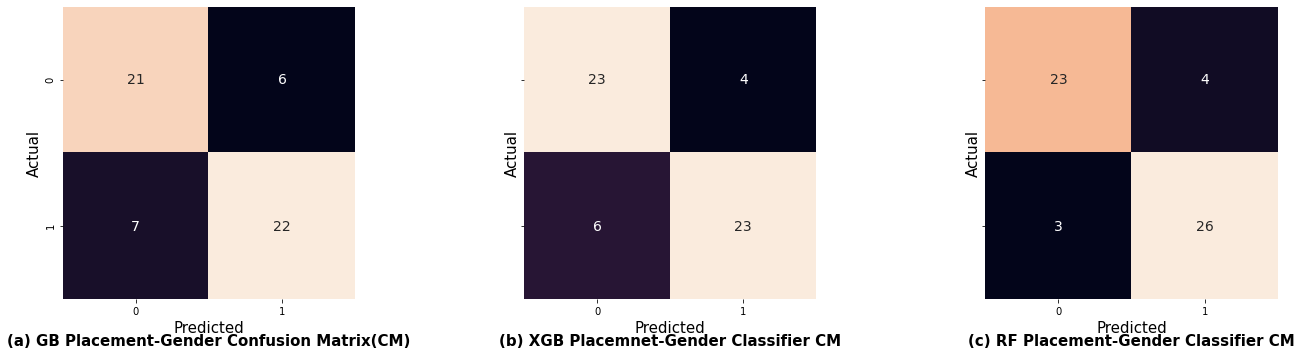

In [110]:
fig,axes=plt.subplots(1,3,figsize=(20,5),sharey=True)

sns.heatmap(confusion_matrix(ytest,gb_ypred),annot=True,ax=axes[0],annot_kws={'size':14},cbar=False,
                square=True)
axes[0].set_title("(a) GB Placement-Gender Confusion Matrix(CM)",fontsize=15,y=-0.18,fontweight='bold')


sns.heatmap(confusion_matrix(ytest,xgb_ypredict),annot=True,ax=axes[1],annot_kws={'size':14},cbar=False,
                square=True)
axes[1].set_title("(b) XGB Placemnet-Gender Classifier CM",fontsize=15,y=-0.18,fontweight='bold')

sns.heatmap(confusion_matrix(ytest,rf_ypredict),annot=True,ax=axes[2],annot_kws={'size':14},cbar=False,
                square=True)
axes[2].set_title("(c) RF Placement-Gender Classifier CM",fontsize=15,y=-0.18,fontweight='bold')
axes[0].set_xlabel('Predicted',fontsize=15)
axes[0].set_ylabel('Actual',fontsize=15)
axes[1].set_xlabel('Predicted',fontsize=15)
axes[1].set_ylabel('Actual',fontsize=15)
axes[2].set_xlabel('Predicted',fontsize=15)
axes[2].set_ylabel('Actual',fontsize=15)
plt.tight_layout()
plt.savefig('fig15.eps')
#plt.savefig('All Model Confusion Matrix.png')


In [111]:
#Roc curve

In [112]:
from sklearn import metrics
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc, roc_curve, recall_score, 
                             classification_report, f1_score, average_precision_score, precision_recall_fscore_support)


In [113]:
# Logistic regression
modelLR = GradientBoostingClassifier(learning_rate=0.2, loss='deviance', max_depth=5)
modelLR.fit(xtrain_res,ytrain_res)
y_pred_prob_lr = modelLR.predict_proba(xtest)[:,1]
fpr_lr, tpr_lr, thresholds_lr = roc_curve(ytest, y_pred_prob_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)
precision_lr, recall_lr, th_lr = precision_recall_curve(ytest, y_pred_prob_lr)



# Random forest
modelRF= RandomForestClassifier(random_state=42, criterion= 'gini',
                            max_features= 7,
                            min_samples_leaf=2,
                            min_samples_split= 2,
                            n_estimators=50,
                            n_jobs=-1,
                            oob_score= True,
                            warm_start= True)
modelRF.fit(xtrain_res,ytrain_res)
y_pred_prob_rf = modelRF.predict_proba(xtest)[:,1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(ytest, y_pred_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)
precision_rf, recall_rf, th_rf = precision_recall_curve(ytest, y_pred_prob_rf)

modelxg= XGBClassifier(gamma=0,
                    learning_rate=0.1,
                    max_delta_step=2,
                    max_depth= 6,min_child_weight=4,
                    n_estimators=200,reg_alpha=0,
                    reg_lambda=8,seed=1)
modelxg.fit(xtrain_res,ytrain_res)
y_pred_prob_xg = modelxg.predict_proba(xtest)[:,1]
fpr_xg, tpr_xg, thresholds_xg = roc_curve(ytest, y_pred_prob_xg)
roc_auc_xg = auc(fpr_xg, tpr_xg)
precision_xg, recall_xg, th_xg = precision_recall_curve(ytest, y_pred_prob_xg)



The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


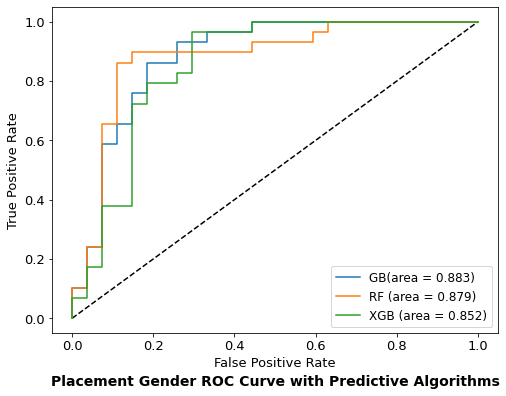

In [114]:
# Plot ROC curve
plt.figure(figsize=(8,6))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_lr, tpr_lr, label='GB(area = %0.3f)' % roc_auc_lr)

plt.plot(fpr_rf, tpr_rf, label='RF (area = %0.3f)' % roc_auc_rf)
plt.plot(fpr_xg, tpr_xg, label='XGB (area = %0.3f)' % roc_auc_xg)
plt.title('ROC curves for Placement-Gender',fontsize=15)
plt.legend(loc='best',fontsize=15)
plt.tick_params(labelsize=13)
plt.xlabel('False Positive Rate',fontsize=13)
plt.ylabel('True Positive Rate',fontsize=13)
plt.title("Placement Gender ROC Curve with Predictive Algorithms",fontsize=14,y=-0.18,fontweight='bold')
plt.legend(loc=0, prop={'size': 12})


plt.savefig('fig13.eps')
plt.show()

#plt.savefig('All ROC curve.png')

In [59]:
#Precision Recall curve

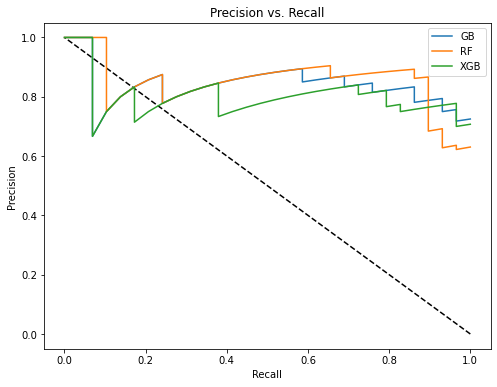

In [60]:
plt.figure(figsize=(8,6))
plt.plot([1, 0], [0, 1], 'k--')
plt.plot(recall_lr, precision_lr, label='GB')

plt.plot(recall_rf, precision_rf, label='RF')
plt.plot(recall_xg, precision_xg, label='XGB')
plt.title('Precision vs. Recall')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='best')
plt.show()